# MACHINE LEARNING AND ENGINEERING APPLICATIONS
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### Technical PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# 3rd Session 
## 1. Ensemble Models
## 2. Data Driven Modeling in Practice: Real Estate Market 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 06 March 2018</span>


In [73]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
from ipywidgets import interact, HTML, FloatSlider
%matplotlib inline

import pysal.esda.mapclassify as mapclassify
import pandas as pd
import os
from mapboxgl.utils import *
from mapboxgl.viz import *
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
from ipywidgets import interact, HTML, FloatSlider
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import Layout
import ipywidgets as widgets
# from IPython.display import display
from IPython import display
from ipywidgets import Layout
import ipywidgets as widgets

# Ensemble Models

In [6]:
# Just for visulization of nn architecture
#Taken from: https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    print (v_spacing/4)
    radius = np.min([v_spacing/4,.03])
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), radius,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
        
            if n==0:
                if m<5:
                    ax.text(n*h_spacing + .9*left, layer_top - m*v_spacing,'$x_{}$'.format(m) , fontsize=10,zorder=10)
            elif n==(len(layer_sizes)-1):
                if m<5:
                    ax.text(n*h_spacing + .9*left, layer_top - m*v_spacing,'$y_{}$'.format(m) , fontsize=10,zorder=10)
            else:
                if m<5:
                    ax.text(n*h_spacing + .9*left, layer_top - m*v_spacing,'$f_{}$'.format(m) , fontsize=10,zorder=10)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size_a):
            for o in xrange(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='gray')
                x = n*h_spacing + left
                y = layer_top_a - m*v_spacing
                dx = (n + 1)*h_spacing + left - x - 1.3*radius
                dy = layer_top_b - o*v_spacing -y 
                line = plt.arrow(x,y,dx,dy, color='gray',head_width=.01,head_length=.01)
                ax.add_artist(line)

# Thinking about the computational graph from the last session
## What happens if each node in the middle layer is a polynomial regressor:
* **With the same input dimension**
* **With similar degree**
* **With the same training data**

# If  this is the case, the nodes are all redundant!

0.02


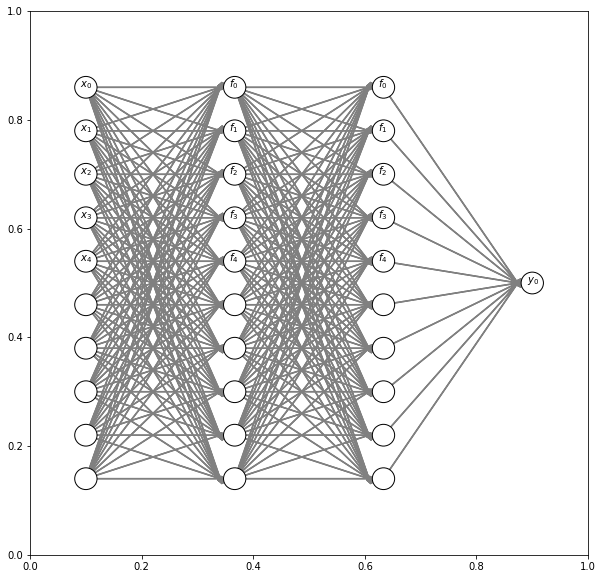

In [104]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [10, 10,10,1],)

In [98]:
from sklearn import linear_model
N= 500
x1 = np.random.rand(N) * 10 - 5
x1 = np.sort(x1)
x1 = x1[:,np.newaxis]
noise = 0.1 
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

y = f(x1) + np.random.normal(0.0, noise, N)
y = y[:,np.newaxis]

def polynomial_regr(degree=10,n_estimators=1):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn import linear_model
    import random
    dlen = x1.shape[0]
    fig = plt.figure(figsize=(7,6))
    Y_ = np.zeros(y.shape)
    
    for i in range(n_estimators):
        
        
        X_tr = x1[:].astype(float)
        y_tr = y[:].astype(float)
        
        
        # They all the same degree
        poly = PolynomialFeatures(degree=degree)
        X_tr_ = poly.fit_transform(X_tr)
        
        
        # And the same input and the same input dimensions
        regr = linear_model.LinearRegression()
        regr.fit(X_tr_, y_tr)
        y_pred_tr = regr.predict(X_tr_)
        
        
        
    
        Y_ = np.add(Y_ , y_pred_tr)
        plt.plot(X_tr,y_pred_tr,'-b',markersize=.02,alpha=.1 );
    Y_ = Y_/float(n_estimators)
    print Y_.shape, y_pred_tr.shape
    plt.plot(X_tr,Y_,'-g',markersize=9,alpha=1 );
    plt.plot(X_tr,y_tr,'.r',markersize=2,alpha=1 );
    plt.xlim(x1.min(),x1.max())
    plt.ylim(y.min(),y.max())

In [99]:
from ipywidgets import interact, HTML, FloatSlider
interact(polynomial_regr,degree=(1,10,1),n_estimators=(1,150,1));

interactive(children=(IntSlider(value=10, description=u'degree', max=10, min=1), IntSlider(value=1, description=u'n_estimators', max=150, min=1), Output()), _dom_classes=('widget-interact',))

# Clearly all the regressors are the same!
<hr style="height:3px;border:none;color:stillblue;background-color:steelblue;" />


<br>
<br>
# Ensembles

<hr style="height:3px;border:none;color:stillblue;background-color:steelblue;" />

# What happens if train each of them with:
* **Different randomly selected data sets**
* **Different randomly selected input dimensions**
* **Differetn randomly selected polynomial degrees**



# How to think about randomization as a resource?

* A very nice reference to this line of discussions: "Statistical Modeling: The Two Cultures" Leo Breiman, https://projecteuclid.org/euclid.ss/1009213726
* **Classically in statistics we fight randomness!**


## Two main data randomization strategies:
* **Random Samples Without/With Replacement (Bootstraping: With replacement)**
* **Random subsets of data points/features**
* **This goes to "Resampling" theories https://en.wikipedia.org/wiki/Bootstrapping_(statistics)**



<hr style="height:3px;border:none;color:stillblue;background-color:steelblue;" />




# This is called Bagging: Bootstrap aggregating

# EXAMPL: Bagging of random polynomial regression models

In [100]:
from sklearn import linear_model
N= 500
x1 = np.random.rand(N) * 10 - 5
x1 = np.sort(x1)
x1 = x1[:,np.newaxis]
noise = 0.1 
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

y = f(x1) + np.random.normal(0.0, noise, N)
y = y[:,np.newaxis]

def polynomial_regr(max_degree=10,n_estimators=1):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn import linear_model
    import random
    dlen = x1.shape[0]
    fig = plt.figure(figsize=(7,6))
    Y_ = np.zeros(y.shape)
    
    for i in range(n_estimators):
        
        
        X_tr = x1[:].astype(float)
        y_tr = y[:].astype(float)
        
        
        # We choose a degree by random
        degree = np.random.randint(2,10)
        poly = PolynomialFeatures(degree=max_degree)
        X_tr_ = poly.fit_transform(X_tr)
        
        
        # We just choose 25% of the data by random for each regressor
        ind = random.sample(range(dlen),int(dlen/4))
        
#         
    
        regr = linear_model.LinearRegression()
        regr.fit(X_tr_[ind], y_tr[ind])
        y_pred_tr = regr.predict(X_tr_)
        
        
        
    
        Y_ = np.add(Y_ , y_pred_tr)
        plt.plot(X_tr,y_pred_tr,'-b',markersize=.02,alpha=.1 );
    Y_ = Y_/float(n_estimators)
    print Y_.shape, y_pred_tr.shape
    plt.plot(X_tr,Y_,'-g',markersize=9,alpha=1 );
    plt.plot(X_tr,y_tr,'.r',markersize=2,alpha=1 );
    plt.xlim(x1.min(),x1.max())
    plt.ylim(y.min(),y.max())

In [101]:
from ipywidgets import interact, HTML, FloatSlider
interact(polynomial_regr,max_degree=(1,10,1),n_estimators=(1,150,1));

interactive(children=(IntSlider(value=10, description=u'max_degree', max=10, min=1), IntSlider(value=1, description=u'n_estimators', max=150, min=1), Output()), _dom_classes=('widget-interact',))

<hr style="height:2px;border:none;color:stillblue;background-color:steelblue;" />

## But for polynomials, Bagging doesn't help that much, as each of them try to have a global view.


## In a way, polynomila regression is a very robust method and it does not overfit. 

# This is good and bad!
<hr style="height:2px;border:none;color:stillblue;background-color:steelblue;" />



# Ensemble works with biased and weak learners only

# What if we perform Bagging on a so called weak learners that overfit?

# It might look contradictory?


# Decision trees are known to overfit to their training data!

<hr style="height:3px;border:none;color:stillblue;background-color:red;" />


### What are Decision trees?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Recursive_Splitting.png/2560px-Recursive_Splitting.png)
* **How to partition the space? Usually greedy algorithms**
* ** More can be found here: https://en.wikipedia.org/wiki/Decision_tree_learning**

* **A nice visual description of Decision tree learning: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/**

### Main Features of Decision Trees
* **simple and understandable! (appealing for domain experts! not for ML people necessarily!)**
* **But limited, with overfitting. This leads to low bias and high variance**


# Tree Bagging example 

In [102]:
x1 = np.random.rand(N) * 10 - 5
x1 = np.sort(x1)
x1 = x1[:,np.newaxis]

# print x1.shape
noise = 0.1 
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

y = f(x1) + np.random.normal(0.0, noise, N)
y = y[:,np.newaxis]

def Tree_Bagging_regr(n_estimators=1):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.tree import DecisionTreeRegressor

    from sklearn import linear_model
    import random
    fig = plt.figure(figsize=(7,6))
    dlen = x1.shape[0]

    Y_ = np.zeros(y.shape)
    
    for i in range(n_estimators):
        
        
        X_tr = x1[:].astype(float)
        y_tr = y[:].astype(float)
        
        
        ind = random.sample(range(dlen),int(dlen/4))
        

        
        regr = DecisionTreeRegressor()
        regr.fit(X_tr[ind], y_tr[ind])
        y_pred_tr = regr.predict(X_tr)[:,np.newaxis]
        
    
        Y_ = np.add(Y_ , y_pred_tr)
        plt.plot(X_tr,y_pred_tr,'-b',markersize=.02,alpha=.1 );
    Y_ = Y_/float(n_estimators)
#     print Y_.shape, y_pred_tr.shape
    plt.plot(X_tr,Y_,'-g',markersize=8,alpha=1 );
    plt.plot(X_tr,y_tr,'.r',markersize=2,alpha=1 );
    plt.xlim(x1.min(),x1.max())
    plt.ylim(y.min(),y.max())

In [103]:
from ipywidgets import interact, HTML, FloatSlider
interact(Tree_Bagging_regr,n_estimators=(1,20,1));

interactive(children=(IntSlider(value=1, description=u'n_estimators', max=20, min=1), Output()), _dom_classes=('widget-interact',))

# Main known Bagging models (think about your data as a 2D matrix)
* **Classical tree bagging (Data Bootstraping)**
* **Random Forests (Data and Feature Bootstraping)**
* **ExtraTrees (Data and Feature Bootstraping + random tree construction)**


# Another strategy is to have dependent weak learners
* **Boosting (Sequentially improving learners)** 


<hr style="height:3px;border:none;color:stillblue;background-color:red;" />
# That is it!

# Now you can develop a lot of interesting applications!

# For the majority of function approximation/classification problems with Non-Homogeneous data sets, works very well.


# Most of the winners of Kaggle competitions are using some sort of ensemble models
# Sckit-Learn Repo has made it super easy to use
* http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

<hr style="height:3px;border:none;color:stillblue;background-color:red;" />

# Data Driven Modeling in Practice: Real Estate Market in Switzerland

![](images/RealEstate.png)


<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />

<hr style="height:6px;border:none;color:stillblue;background-color:steelblue;" />
# My original question: Can we test machine learning for real estate property evaluation?

# Main challenge: Where to get the relevant data from?
<hr style="height:6px;border:none;color:stillblue;background-color:steelblue;" />

# Different data collection strategies:

## 0-Easy if you have a simulator for your specific case (usually in engineering problems)

## 1- Ready to use data sets, usually prepared by the governments or local agencies 
* **Such as census data: https://data2.nhgis.org/main**

## 2- Open source data sets 
* **Usually a bit messy, but free to use (Such as Open Street Map: http://openpoimap.org/)**
* **On top of OSM: Mapbox for interactive visualizations: https://www.mapbox.com/studio/**

<center>[different styles](./styling_example.html)</center>
<center>[3d real time maps](./mapboxgl3d.html)</center>
<center>[3d real time maps with custom data](./3dToronto.html)</center>
<center> [In the context of gaming, AR and VR](https://www.mapbox.com/unity/)</center>

## 3 - APIs (Usually not free, but very easy to use!)
* **Google APIs: https://console.developers.google.com/apis/library?project=places-195919** 


## 4-Web crawling 
* **Write little bots or spiders, who constantly look at a website you like!**
* **My bots in Zurich!**


# So waht we did was to write our own crawlers!
### (live)
* https://www.homegate.ch/en

# Data Wrangling 
# Usually around 80% of the time of a data driven project!

# For example in this project:
* **Geocoding**
* **Filling the Missing data** 
* **Finding other necessary data sets (e.g. building locations)**



# Finally we get the cleaned data

In [105]:
path = './Images/rentalprice.csv'
Mat_all = pd.read_csv(path)
print (Mat_all.shape)
Mat_all.head()

(20999, 11)


,Rent,ZIP,Type_Apartment,Type_Duplex,Type_Single house,Type_Studio,Rooms,Year built,Living space,lng,lat
0,645.0,5000,1.0,0.0,0.0,0.0,1.0,1954.0,28.0,8.041672,47.397999
1,1340.0,5000,1.0,0.0,0.0,0.0,4.0,1971.0,88.0,8.057444,47.379288
2,1380.0,5000,1.0,0.0,0.0,0.0,3.0,1968.0,69.0,8.057165,47.378022
3,1480.0,5000,1.0,0.0,0.0,0.0,3.5,1976.0,81.0,8.057974,47.400780
4,1500.0,5000,1.0,0.0,0.0,0.0,4.0,1968.0,80.0,8.057165,47.378022


In [106]:
# Must be a public token, starting with `pk`
token = 'pk.eyJ1Ijoic2V2YW1vbyIsImEiOiJjamUzM2ZqdjUyaXM4MzRzNm94ZHJmZTF5In0.dH8Wmm09-Co8yDk3XdRV_A'
# Create a geojson file export from the current dataframe

keys = list(Mat_all.columns[:-2].values[:])
df_to_geojson(Mat_all, filename='points1.geojson',
              properties=keys,
                     lat='lat', lon='lng', precision=15)

{'feature_count': 20999, 'filename': 'points1.geojson', 'type': 'file'}

In [107]:
%config InlineBackend.close_figures=False 
from IPython.display import IFrame
options = keys
selector_Mmap=widgets.Select(
    options=options,
    value=options[0],
    # rows=10,
    description='Rent',
    disabled=False,
    layout=Layout(width = '500px',
                  fontsize='3.5em',
                  display='flex',
                    flex_flow='row', 
                    align_items='stretch',
                  border='solid'
                 ),
#     rows = len(options)
)



display.display(selector_Mmap)

button = widgets.Button(
    description='Show map',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon=''

)
display.display(button)

frame = IFrame("viz_dynamic.html",width='100%', height=600)
def showmap(button):
    
    # Generate data breaks and color stops from colorBrewer
    color_breaks = mapclassify.Natural_Breaks(Mat_all[selector_Mmap.value], k=8, initial=10).bins
    color_stops = create_color_stops(color_breaks, colors='YlOrRd')
    # Create the viz from the dataframe
    
    
    
    viz_dynamic = CircleViz('points1.geojson',
                access_token=token, 
                height='600px',
                label_property=selector_Mmap.value,
                color_property = selector_Mmap.value,
                color_stops = color_stops,
                center = (8.541694,46.8),
                zoom = 7,
                below_layer = 'waterway-label',)


    viz_dynamic.label_property = "test1"
    viz_dynamic.style_url='mapbox://styles/mapbox/streets-v9?optimize=true'
    with open('viz_dynamic.html', 'w') as f:
        f.write(viz_dynamic.create_html())
    display.clear_output(wait=True)
    display.display(selector_Mmap)
    display.display(button)
    display.display(frame,display_id='tt')

    
button.on_click(showmap)

Select(description=u'Rent', index=7, layout=Layout(align_items=u'stretch', border=u'solid', display=u'flex', flex_flow=u'row', width=u'500px'), options=('Rent', 'ZIP', 'Type_Apartment', 'Type_Duplex', 'Type_Single house', 'Type_Studio', 'Rooms', 'Year built', 'Living space'), value='Year built')

Button(button_style=u'success', description=u'Show map', style=ButtonStyle(), tooltip=u'Click me')

# Training an automated rental price estimator

### In the current market: We have local knowledge about prices
### There is no free service for this task in Switzerland

# But this seemed to be an easy task for Ensemble methods

In [108]:
path = './Images/rentalprice.csv'
Mat_all = pd.read_csv(path)
print (Mat_all.shape)
Mat_all.head()

(20999, 11)


,Rent,ZIP,Type_Apartment,Type_Duplex,Type_Single house,Type_Studio,Rooms,Year built,Living space,lng,lat
0,645.0,5000,1.0,0.0,0.0,0.0,1.0,1954.0,28.0,8.041672,47.397999
1,1340.0,5000,1.0,0.0,0.0,0.0,4.0,1971.0,88.0,8.057444,47.379288
2,1380.0,5000,1.0,0.0,0.0,0.0,3.0,1968.0,69.0,8.057165,47.378022
3,1480.0,5000,1.0,0.0,0.0,0.0,3.5,1976.0,81.0,8.057974,47.400780
4,1500.0,5000,1.0,0.0,0.0,0.0,4.0,1968.0,80.0,8.057165,47.378022


# Out of sample predictions

In [109]:
sel_cols = range(1,Mat_all.shape[1])
X = Mat_all.values[:,sel_cols]
y = Mat_all.values[:,0]

import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


# Different types of regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def my_custom_loss_func(ground_truth, predictions):
    return np.around(np.median(100*np.abs(predictions-ground_truth)/ground_truth),decimals=1)


n_estimators = 300
regr = DecisionTreeRegressor()
regr.fit(X_train,y_train)
preds = regr.predict(X_test)
print 'Median Accuracy for DecisionTreeRegressor',100-my_custom_loss_func(y_test,preds),'%'


regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=n_estimators,n_jobs=-1)
regr.fit(X_train,y_train)
preds = regr.predict(X_test)
print 'Median Accuracy for BaggingRegressor', 100-my_custom_loss_func(y_test,preds),'%'


regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=None,min_samples_split=2, random_state=0,n_jobs=-1)
regr.fit(X_train,y_train)
preds = regr.predict(X_test)
print 'Median Accuracy for RandomForestRegressor', 100-my_custom_loss_func(y_test,preds),'%'

regr = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=None,min_samples_split=2, random_state=0,n_jobs=-1)
regr.fit(X_train,y_train)
preds = regr.predict(X_test)
print 'Median Accuracy for ExtraTreesRegressor', 100-my_custom_loss_func(y_test,preds),'%'


n_estimators = 2000
regr = xgb.XGBRegressor(max_depth=X_train.shape[1], learning_rate=0.1, n_estimators=n_estimators, silent=True, objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
regr.fit(X_train,y_train,)
preds = regr.predict(X_test)
print 'Median Accuracy for XGBoost', 100-my_custom_loss_func(y_test,preds),'%'


degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_ = poly.fit_transform(X_train)
regr = linear_model.LinearRegression()
regr.fit(X_train_, y_train)

X_test_ = poly.fit_transform(X_test)
preds = regr.predict(X_test_)
print 'Median Accuracy for Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1]), 100-my_custom_loss_func(y_test,preds),'%'


degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_ = poly.fit_transform(X_train)
regr = linear_model.LinearRegression()
regr.fit(X_train_, y_train)

X_test_ = poly.fit_transform(X_test)
preds = regr.predict(X_test_)
print 'Median Accuracy for Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1]), 100-my_custom_loss_func(y_test,preds),'%'

degree = 4
poly = PolynomialFeatures(degree=degree)
X_train_ = poly.fit_transform(X_train)
regr = linear_model.LinearRegression()
regr.fit(X_train_, y_train)

X_test_ = poly.fit_transform(X_test)
preds = regr.predict(X_test_)
print 'Median Accuracy for Polynomial_degree:{} with dimensions: {} '.format(degree,X_train_.shape[1]), 100-my_custom_loss_func(y_test,preds),'%'


Median Accuracy for DecisionTreeRegressor 90.9 %
Median Accuracy for BaggingRegressor 93.0 %
Median Accuracy for RandomForestRegressor 92.9 %
Median Accuracy for ExtraTreesRegressor 92.8 %
Median Accuracy for XGBoost 93.5 %
Median Accuracy for Polynomial_degree:2 with dimensions: 66  86.9 %
Median Accuracy for Polynomial_degree:3 with dimensions: 286  87.6 %
Median Accuracy for Polynomial_degree:4 with dimensions: 1001  88.1 %


## This method of out of sample prediction is data demanding 
## Further, it might be overfitted to test data
#### There is a better way than this...

# Cross Validation
## K-fold 

#### (Many thanks to Scikit-Learn people)

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor



from sklearn.metrics import make_scorer
def my_custom_loss_func(ground_truth, predictions):
    return np.around(100-np.median(100*np.abs(predictions-ground_truth)/ground_truth),decimals=1)


# def my_custom_loss_func(ground_truth, predictions):
#     return np.median(-100*np.abs(predictions-ground_truth)/ground_truth)

loss = make_scorer(my_custom_loss_func, greater_is_better=True)

# loss = 'neg_median_absolute_error'
# loss = None


sel_cols = range(1,Mat_all.shape[1])
X = Mat_all.values[:,sel_cols]
y = Mat_all.values[:,0]

n_estimators = 100

regr = DecisionTreeRegressor()
scores = cross_val_score(regr, X, y,cv=3,scoring=loss)
print 'DecisionTreeRegressor',  np.median(scores)                             

regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=n_estimators,n_jobs=-1)
scores = cross_val_score(regr, X, y,cv=3,scoring=loss)
print 'BaggingRegressor', np.median(scores)  

regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=None,min_samples_split=2, random_state=0,n_jobs=-1)
scores = cross_val_score(regr, X, y,cv=3,scoring=loss)
print 'RandomForestRegressor', np.median(scores)                               

regr = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=None,min_samples_split=2, random_state=0,n_jobs=-1)
scores = cross_val_score(regr, X, y,cv=3,scoring=loss)
print 'ExtraTreesRegressor', np.median(scores)  

n_estimators = 200
regr = xgb.XGBRegressor(max_depth=X_train.shape[1], learning_rate=0.1, n_estimators=n_estimators, silent=True, objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
scores = cross_val_score(regr, X, y,cv=3,scoring=loss)
print 'XGBoost', np.median(scores) 

# regr.fit(X_train,y_train,)
# preds = regr.predict(X_test)
# print 'Median Accuracy for XGBoost', 100-my_custom_loss_func(y_test,preds),'%'


DecisionTreeRegressor 90.7
BaggingRegressor 92.4
RandomForestRegressor 92.5
ExtraTreesRegressor 92.1
XGBoost 92.9


<hr style="height:6px;border:none;color:stillblue;background-color:red;" />


# Voluntary task: Test the neural network model from the last session for this data set and compare its results with what we get from these ensembles

<hr style="height:6px;border:none;color:stillblue;background-color:red;" />


<br>
<br>
# Toward a real world application

## Deploying the trained model on a web application

* **We need to serve the trained model like an API.** 

In [ ]:
# from sklearn.externals import joblib

# # Dump the trained model
# joblib.dump(regr, 'model.pkl')

# # Load it like this on the server
# regr = joblib.load('model.pkl')

* **To do so, we need a "Web Framework"** 
    * <a href=http://flask.pocoo.org/> Flask is a nice, minimal and easy one!</a>
* **Further, we need a host and server which works with Flask.**
    * <a href=https://www.pythonanywhere.com/> https://www.pythonanywhere.com/</a>

# [Live demo](http://www.keylead.ch)
![](images/RealEstate.png)